# LABORATORIO 3
## POLO FIGUEROA 24000569

IMPORTACION DE LIBRERIAS

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from math import radians, cos, sin, asin, sqrt
import warnings
warnings.filterwarnings('ignore')

1. ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

total_size = boolean_size * n


In [7]:
# Usando NumPy y el atributo nbytes
array_bool_np = np.array([True] * 1000, dtype=bool)
size_bytes_np = array_bool_np.nbytes

size_bytes_np

1000

2. Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [8]:
# generacion de data
array_even = np.arange(2, 101, 2)[::-1] 
# selleccion de los ultimos diez
last_10 = array_even[-10:] 

last_10

array([20, 18, 16, 14, 12, 10,  8,  6,  4,  2])

3. Dado el array_A [2456, 0374, 8852, 1561] Seleccione con una instrucción el sub_array_B[0374]. Después, seleccione el sub_array_C de elementos [25, 85]

In [16]:
array_A = np.array([2456, 374, 8852, 1561])

# sub_array_B, unicamente se selecciona la segunda posicion (recordando que [0] es la primer posicion)
sub_array_B = array_A[1]


# sub_array_C
array_str = ''.join(array_A.astype(str)) #conversion a 'string' para contar los espacios
sub_array_C = array_str[0:3] + ' ' + array_str[8:10] 

sub_array_B, sub_array_C

(374, '245 85')

4. Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [ ]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])
diferencia = a - b
media_aritmetica = np.mean(diferencia)
media_aritmetica

5. Dados los valores de las coordenadas (x, y) en las columnas [1.33, 4.5],[30.0 10.7] del array
Agregue a este array las coordenadas (37.1, -3.6).
Muestre en pantalla las dimensiones del nuevo array.

In [18]:
A = np.array([[1.33, 4.5], [30.0, 10.7]])
B = np.append(A, [[37.1, -3.6]], axis=0)

B.shape

(3, 2)

6. Copie el array del ejercicio anterior. Traspóngalo (. Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0).

In [19]:
B_traspose = B.T


B_re_traspose = B_traspose.T
nuevas_coordenadas = np.array([[10.8, 3.0], [35.8, 12.0]])
B_final = np.append(B_re_traspose, nuevas_coordenadas, axis=0)

# Mostrar el array final y sus dimensiones
B_final, B_final.shape

(array([[ 1.33,  4.5 ],
        [30.  , 10.7 ],
        [37.1 , -3.6 ],
        [10.8 ,  3.  ],
        [35.8 , 12.  ]]),
 (5, 2))

In [24]:

df = pd.read_csv('NucleosPoblacion.csv')
df.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


In [26]:
filtro_1 = df[df['Poblacion'] > 100000]

n_municipios_100k = municipios_mas_100k.shape[0]
n_municipios_100k

62

top_10_ciudades = df.nlargest(10, 'Poblacion')
top_10_ciudades_desc = top_10_ciudades.sort_values(by='Poblacion', ascending=True)

# Crear la gráfica de barras ajustada
plt.figure(figsize=(10, 8))
plt.barh(top_10_ciudades_desc['Texto'], top_10_ciudades_desc['Poblacion'], color='salmon')
plt.xlabel('Población')
plt.ylabel('Ciudad')
plt.title('Top 10 ciudades con mayor población (mayor a menor)')
plt.tight_layout()
plt.show()

In [32]:
# identificacion de la segunda ciudad mas poblada y posición que ocupa Granada
df_ordenado = df.sort_values(by='Poblacion')
segunda_mas_poblada = df_ordenado['Texto'].iloc[-2]
posicion_granada = df_ordenado[df_ordenado['Texto'].str.contains('Granada', case=False)].index[0]
ranking_granada = df_ordenado.index.get_loc(posicion_granada) + 1  # Ajustar el índice a un ranking humano

segunda_mas_poblada, ranking_granada

('Barcelona', 835)

Visualmente, se puede identicar que, Barcelona es la segunda ciudad mas poblada. El ranking de Granada es 835.

3. ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?.

In [33]:
# Municipios de Extremadura (provincias de Cáceres y Badajoz) con más de 5000 habitantes
municipios_extremadura_5000 = df[((df['Provincia'] == 'Cáceres') | (df['Provincia'] == 'Badajoz')) & (df['Poblacion'] > 5000)]

# Contar el número de municipios que cumplen el criterio
numero_municipios_extremadura_5000 = municipios_extremadura_5000.shape[0]
numero_municipios_extremadura_5000

14

4. ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [35]:
# Encontrar el municipio situado más al norte usando el valor máximo de la coordenada "Y" (latitud)
norte = df.loc[df['Y'].idxmax()]

# Extraer la información relevante del municipio más al norte
nombre_municipio_norte = norte['Municipio']
provincia_municipio_norte = norte['Provincia']
poblacion_municipio_norte = norte['Poblacion']

nombre_municipio_norte, provincia_municipio_norte, poblacion_municipio_norte


('Viveiro', 'Lugo', 16211.0)

5. Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [36]:
# Filtrar los municipios de la provincia de Granada
municipios_granada = df[df['Provincia'] == 'Granada']

# Calcular estadísticas descriptivas de la población de los municipios de Granada
estadisticas_granada = municipios_granada['Poblacion'].agg(['mean', 'median', 'std', 'max', 'min'])
estadisticas_granada

mean       30217.850000
median     17526.000000
std        50355.491715
max       239154.000000
min        10386.000000
Name: Poblacion, dtype: float64

6. Realice un histograma con la población de los Municipios para cada una de las provincias.

In [39]:
listado_provincias = df['Provincia'].unique()
listado_provincias


array(['Las Palmas', 'Santa Cruz de Tenerife', 'Badajoz', 'Cáceres',
       'Cádiz', 'A Coruña', 'Huelva', 'León', 'Lugo', 'Ourense',
       'Asturias', 'Pontevedra', 'Salamanca', 'Sevilla', 'Albacete',
       'Alacant/Alicante', 'Álava', 'Almería', 'Ávila', 'Burgos',
       'Castelló/Castellón', 'Ciudad Real', 'Córdoba', 'Cuenca',
       'Granada', 'Guadalajara', 'Guipúzcoa', 'Huesca', 'Jaén',
       'La Rioja', 'Madrid', 'Málaga', 'Murcia', 'Navarra', 'Palencia',
       'Cantabria', 'Segovia', 'Soria', 'Teruel', 'Toledo',
       'València/Valencia', 'Valladolid', 'Vizcaya', 'Zamora', 'Zaragoza',
       'Ceuta', 'Illes Balears', 'Barcelona', 'Girona', 'Lleida',
       'Tarragona', 'Melilla'], dtype=object)

Ingresa el nombre de la provincia:  Las Palmas


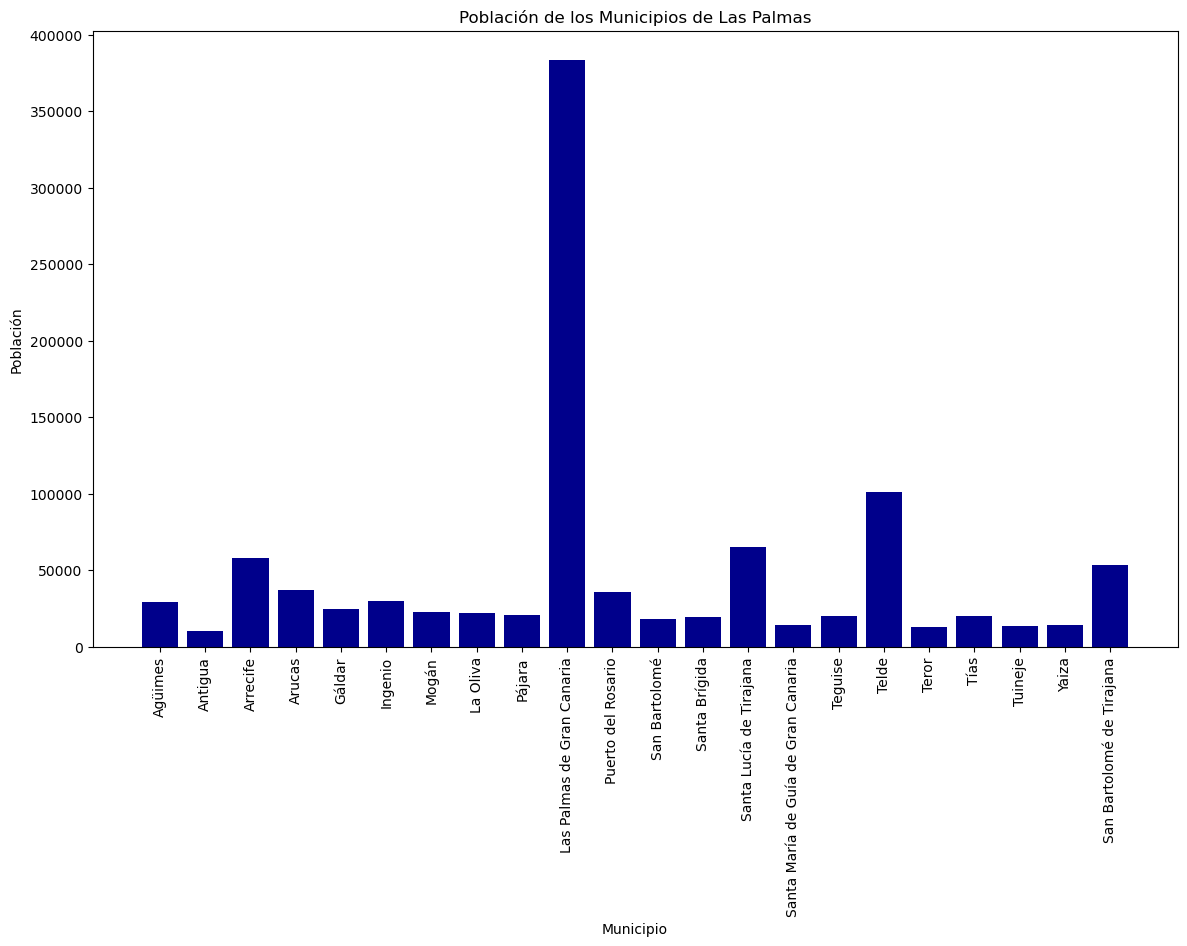

In [41]:

nombre_provincia = input("Ingresa el nombre de la provincia: ")

# Filtrar los municipios de la provincia ingresada
municipios_provincia = df[df['Provincia'].str.strip().eq(nombre_provincia.strip())]

# Gráfico de barras para la población de todos los municipios de la provincia ingresada
plt.figure(figsize=(14, 8))
plt.bar(municipios_provincia['Municipio'], municipios_provincia['Poblacion'], color='darkblue')
plt.title(f'Población de los Municipios de {nombre_provincia}')
plt.xlabel('Municipio')
plt.ylabel('Población')
plt.xticks(rotation=90)
plt.show()


7. Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [44]:
# seleccion de muestra
sample_m = df.sample(n=50, replace=False)

# calculo de promedio y desviacion stardard
poblacion_mean = sample_m['Poblacion'].mean()
poblacion_sd = sample_m['Poblacion'].std()

poblacion_mean, poblacion_sd

(38866.4, 48323.69518915843)

8. Determine los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [48]:
def haversine(lon1, lat1, lon2, lat2):
    """
     la distancia en kilómetros entre dos puntos en la Tierra dadas sus latitudes y longitudes.
    """
    # Convertir coordenadas de grados a radianes
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Fórmula Haversine
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radio de la Tierra en kilómetros
    return c * r

# Coordenadas de Madrid
madrid_lon = -3.7038
madrid_lat = 40.4168

# Excluir a Madrid del análisis si estuviera presente
df_sin_madrid = df[df['Municipio'] != 'Madrid']

# Calcular la distancia de cada municipio a Madrid
df_sin_madrid['Distancia_a_Madrid'] = df_sin_madrid.apply(lambda x: haversine(madrid_lon, madrid_lat, x['X'], x['Y']), axis=1)

# Encontrar los municipios más cercano y más lejano a Madrid
municipio_mas_cercano = df_sin_madrid.loc[df_sin_madrid['Distancia_a_Madrid'].idxmin()]
municipio_mas_lejano = df_sin_madrid.loc[df_sin_madrid['Distancia_a_Madrid'].idxmax()]

municipio_mas_cercano_info = (municipio_mas_cercano['Municipio'], municipio_mas_cercano['Distancia_a_Madrid'])
municipio_mas_lejano_info = (municipio_mas_lejano['Municipio'], municipio_mas_lejano['Distancia_a_Madrid'])

municipio_mas_cercano_info, municipio_mas_lejano_info

(('Pozuelo de Alarcón', 6.905847034799361),
 ('Los Llanos de Aridane', 1840.234817201702))